In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

## Logistic Regression

In [ ]:
df = pd.read_csv('..\\data\\clean\\ordinal_encoded.csv')

X = df.drop('class_value', axis=1)
y = df['class_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = LogisticRegression(
    random_state = 0,
    solver='lbfgs',
    max_iter=1000
)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")
print("\nClassification Report:")
print(class_report)

Model Performance:
Accuracy: 0.8382
Macro F1 Score: 0.6727

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        77
           1       0.58      0.50      0.54        14
           2       0.88      0.97      0.92       242
           3       0.70      0.54      0.61        13

    accuracy                           0.84       346
   macro avg       0.72      0.64      0.67       346
weighted avg       0.83      0.84      0.83       346



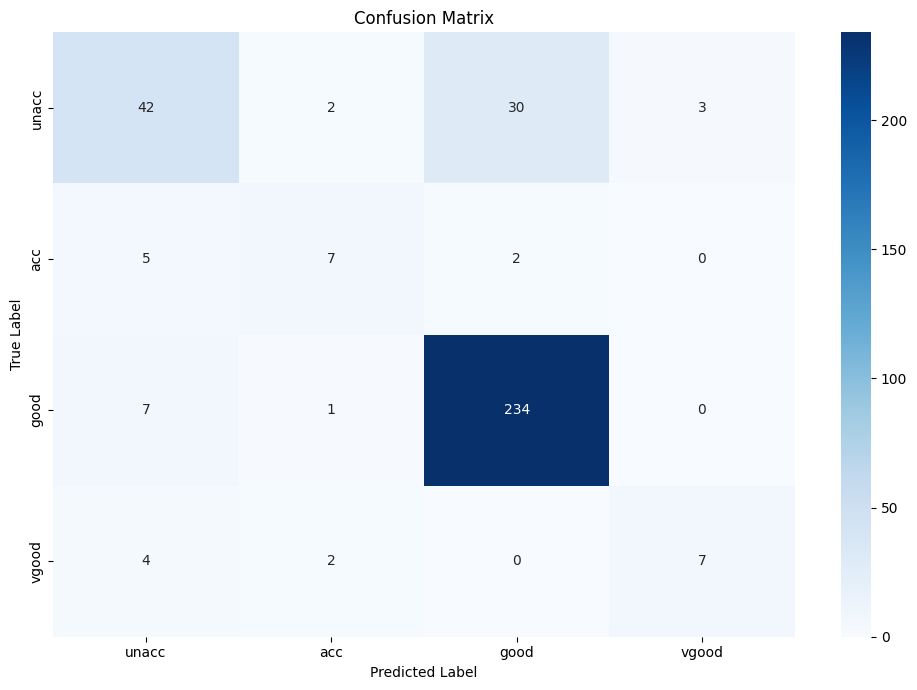

In [ ]:
class_names = ['unacc', 'acc', 'good', 'vgood']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

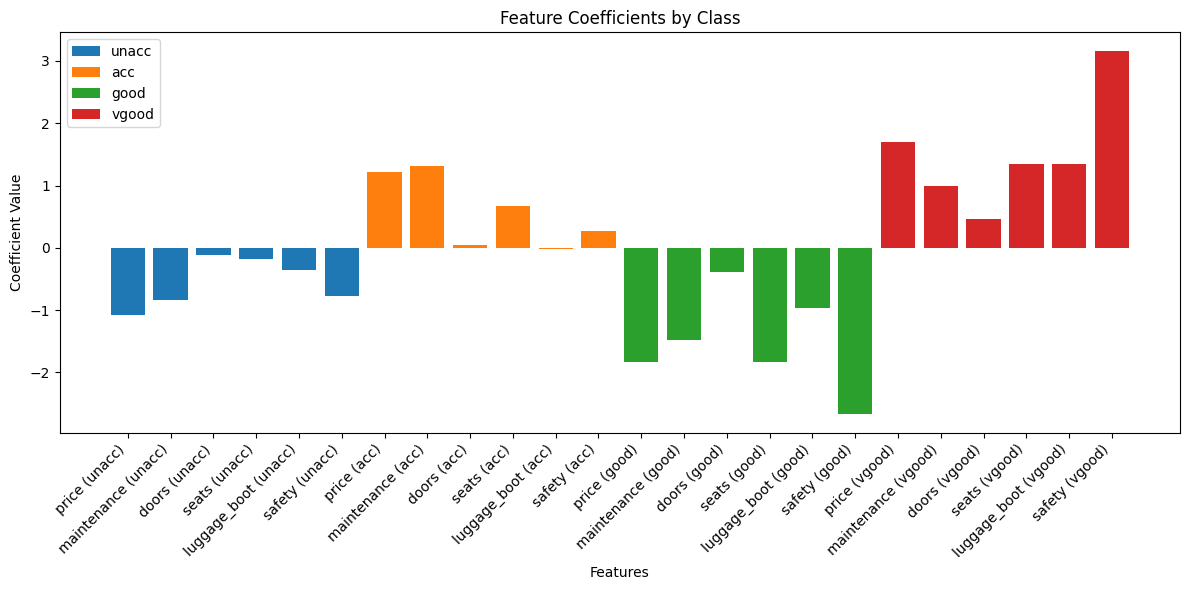

In [ ]:
feature_names = X.columns
coefficients = model.coef_

plt.figure(figsize=(12,6))
for i, class_name in enumerate(class_names):
    plt.bar(
        [f"{name} ({class_name})" for name in feature_names], 
        coefficients[i], 
        label=class_name
    )
plt.title('Feature Coefficients by Class')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()